In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('churn.csv')

In [3]:
len(df)

7043

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


There are many columns so we transpose the dataframe to view the columns properly

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The 'SeniorCitizen' column has type of int64 meaning integer.
Object means string data type
'TotalCharges' shoule be  a numeric type(int or float) not a string
->can be because the column contains a space (" ") to represent a missing value
When dealing with non numeric characters,Pandas declare the column to be of type "object"


In [7]:
total_charges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [8]:
total_charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


We can spot nonnumeric data in a column by parsing the content as numeric
and see at which rows the parsing fails.

In [10]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [11]:
df.TotalCharges=df.TotalCharges.fillna(0)

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.columns=df.columns.str.lower().str.replace(' ','_')
print(df.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [14]:
string_columns=list(df.dtypes[df.dtypes=='object'].index)
#df.dtypes[df.dtypes == 'object'] returns a Series with column names that have the data type 'object'.

In [15]:
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','__')

In [16]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Converting target variables to numbers

In [17]:
df.churn =(df.churn=='yes').astype(int)

df.churn=='yes' ->result is a boolean series of True and False
astype(int): This converts the boolean values (True and False) to integers. In Python, True converts to 1 and False converts to 0.

In [18]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)

In [21]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no__internet__service,...,no__internet__service,no__internet__service,no__internet__service,no__internet__service,two__year,no,mailed__check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one__year,no,credit__card__(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two__year,no,bank__transfer__(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one__year,no,electronic__check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one__year,no,electronic__check,70.40,2044.75,0


Now,we again split the df_train_full dataframe into train and validation

In [22]:
df_train,df_val=train_test_split(df_train_full,test_size=0.33,random_state=11)

In [23]:
#here we separate the target values for both train and validation data
y_train=df_train.churn.values
y_val=df_val.churn.values

In [24]:
#as we saved the target values we can now delete the target column for the training and validation data
del df_train['churn']
del df_val['churn']


EDA

In [25]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Distribution of values in the target variable

In [26]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

Majority of customers didn't churn
Now we calculate the churn rate

In [27]:
global_mean=df_train_full.churn.mean()
round(global_mean,3)

0.27

Our churn dataset is a so-called imbalaned dataset.
-class imbalance

Now we separate the categorical and numerical columns 

In [28]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
'phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection',
'techsupport', 'streamingtv', 'streamingmovies',
'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature Importance Analysis


->For each unique value in the categorical column,we calculate the churn rate(group churn rate)
->Then we compare it with the global churn rate,if the difference between the rates is small,the value is not that important when predicting chunk and vice versa.
->We start with the gender variable

In [30]:
male_mean=df_train_full[df_train_full.gender=='male'].churn.mean()
print(male_mean)

0.2632135306553911


In [31]:
female_mean=df_train_full[df_train_full.gender=='female'].churn.mean()
print(female_mean)

0.27682403433476394


We observed  that the gender of the customer doesn't help us indentify if they will churn or not

In [32]:
df_train_full.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [33]:
partner_yes_mean=df_train_full[df_train_full.partner=='yes'].churn.mean()
print(partner_yes_mean)

0.20503330866025166


In [34]:
partner_no_mean=df_train_full[df_train_full.partner=='no'].churn.mean()
print(partner_no_mean)

0.3298090040927694


Churn rate for people with a partner is significantly less compared to the people with no partner.So 'partner' variable is useful in predicting churn

Risk  ratio-> ratio between probabilities in different groups
here risk means the risk of having the effect ,which in our case is the risk of churning
risk=group rate / global rate (between 0 and infinity)
risk <=1 low risk or similar risk as anyone else
risk>1 high risk of churning 


In [35]:
for col in categorical:
 df_group=df_train_full.groupby(by=col).churn.agg(['mean'])
 df_group['diff']=df_group['mean']-global_mean
 df_group['risk']=df_group['mean']/global_mean
 print(df_group)


            mean      diff      risk
gender                              
female  0.276824  0.006856  1.025396
male    0.263214 -0.006755  0.974980
                   mean      diff      risk
seniorcitizen                              
0              0.242270 -0.027698  0.897403
1              0.413377  0.143409  1.531208
             mean      diff      risk
partner                              
no       0.329809  0.059841  1.221659
yes      0.205033 -0.064935  0.759472
                mean      diff      risk
dependents                              
no          0.313760  0.043792  1.162212
yes         0.165666 -0.104302  0.613651
                  mean      diff      risk
phoneservice                              
no            0.241316 -0.028652  0.893870
yes           0.273049  0.003081  1.011412
                        mean      diff      risk
multiplelines                                   
no                  0.257407 -0.012561  0.953474
no__phone__service  0.241316 -0.028652  0

Mutual Information-degree of dependency between categorical variable and the target variable

In [37]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series,df_train_full.churn)
df_mi=df_train_full[categorical].apply(calculate_mi)
df_mi=df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi


,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


we can see that 'contract' is the most useful variable and gender is the least useful.


mutual information is applicable only to two categorical column.
To gain information about the numerical column and its effect on the binary target  we can  make use of  correlation coefficient.

In [38]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Feature Engineering
->One hot encoding for categorical variables


In [39]:
train_dict=df_train[categorical+numerical].to_dict(orient='records')
print(train_dict[0])

{'gender': 'male', 'seniorcitizen': 0, 'partner': 'yes', 'dependents': 'no', 'phoneservice': 'yes', 'multiplelines': 'no', 'internetservice': 'dsl', 'onlinesecurity': 'yes', 'onlinebackup': 'yes', 'deviceprotection': 'yes', 'techsupport': 'yes', 'streamingtv': 'yes', 'streamingmovies': 'yes', 'contract': 'two__year', 'paperlessbilling': 'yes', 'paymentmethod': 'bank__transfer__(automatic)', 'tenure': 71, 'monthlycharges': 86.1, 'totalcharges': 6045.9}


In [40]:
from sklearn.feature_extraction import DictVectorizer

In [41]:
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [42]:
#convert the dictionary into a matrix
X_train=dv.transform(train_dict)
print(X_train[0])

[0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 8.6100e+01 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 7.1000e+01 6.0459e+03]


In [43]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one__year',
       'contract=two__year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no__internet__service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber__optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no__phone__service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no__internet__service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no__internet__service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank__transfer__(automatic)',
       'paymentmethod=credit__card__(automatic)',
       'paymentmethod=electronic__check', 'paymentmethod=mailed__check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no__

Implementing logistic regression


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [46]:
val_dict=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dict)

In [47]:
y_pred=model.predict_proba(X_val)[:,1]

In [48]:
print(y_pred)

[0.23490853 0.268859   0.31945071 ... 0.05725092 0.61522913 0.06127269]


The output(probabilities) is often called soft predicitons.
It tells us the probability of churning as a number between 0 and 1.Interpretation of this output depends upon us.
We can specify a threshold to make binary prediction easier

In [49]:
churn=y_pred >=0.5

The comparison operatiors in NumPy are applied element-wise.
result is an array containing Boolean values.

In [50]:
(y_val==churn).mean()

0.8016129032258065

Our model has made correct predicitons in 80% of the total cases.

Model Interpretation


In [51]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one__year': -0.086,
 'contract=two__year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no__internet__service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber__optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no__phone__service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no__internet__service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no__internet__service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank__transfer__(automatic)': -0.027,
 'paymentmethod=credit__card__(automatic)': -0.136,
 'paymentmethod=electronic_

Working with small data to better understand the model

In [52]:
small_subset=['contract','tenure','totalcharges']
train_dict_small=df_train[small_subset].to_dict(orient='records')
dv_small=DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)
X_small_train=dv_small.transform(train_dict_small)
print(X_small_train)

[[0.00000e+00 0.00000e+00 1.00000e+00 7.10000e+01 6.04590e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 6.00000e+01 6.02900e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 4.60000e+01 2.06515e+03]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 2.00000e+00 2.83000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 2.30000e+01 4.70600e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 6.40000e+01 5.32725e+03]]


In [53]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one__year',
       'contract=two__year', 'tenure', 'totalcharges'], dtype=object)

In [54]:
model_small=LogisticRegression(solver='liblinear',random_state=1)
model_small.fit(X_small_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [55]:
dict(zip(dv_small.get_feature_names_out(),model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.91,
 'contract=one__year': -0.144,
 'contract=two__year': -1.404,
 'tenure': -0.097,
 'totalcharges': 0.001}

If a weight is positive,the respective feature is an indicator of churn and vice versa.

Scoring a customer

In [56]:
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [57]:
x_test=dv.transform([customer])
print(x_test)

[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 7.98500e+01 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 4.10000e+01 3.32075e+03]]


In [58]:
model.predict_proba(x_test)[0,1]

0.08134987004742092

The probability of churning for the above customer is only 8%.

Noe lets see the accuracy on the validation set

In [67]:
y_pred=model.predict_proba(X_val)[:,1]
churn=y_pred>=0.5
(churn==y_val).mean()

0.8016129032258065

We can see the model is 80% accurate


In [68]:
from sklearn.metrics import accuracy_score

In [73]:
thresholds=np.linspace(0,1,11)
for t in thresholds:
    churn=y_pred>=t
    acc=accuracy_score(y_val,churn)
    print('%0.2f %0.3f' %(t,acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


We can see using threshold of 0.5 has given us with the highest accuracy

In [74]:
thresholds=np.linspace(0,1,21)
accuracies=[]
for t in thresholds:
    acc=accuracy_score(y_val,y_pred>=t)
    accuracies.append(acc)

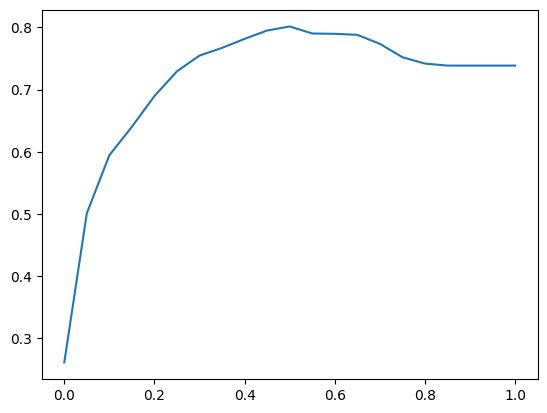

In [75]:
plt.plot(thresholds,accuracies)